# Figure2(Stackedbar)

In [1]:
import sys, os
p = os.path.abspath('..')
sys.path.insert(1, p)

pp = os.path.abspath('../../visualization')
sys.path.insert(1, pp)

In [2]:
from gc import collect

from utils.statistics import *
from utils.settings import set_matplotlib
from distribution_collector import (collect_topic_distributions,
                                get_top_and_bottom_topics,
                                extract_specific_topics)
from constants import CONSTANTS
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib as mpl

import psycopg2
import pandas as pd
import numpy as np
from utils.statistics import *
import config.config as conf
import datetime
import re
# 포뮬러 구성
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd


In [3]:
from matplotlib import font_manager
import matplotlib as mpl
from matplotlib import font_manager as fm

# 설치된 폰트 이름과 경로 확인
for font in font_manager.fontManager.ttflist:
    if 'Helvetica' in font.name: # 'Nanum' 대신 원하는 글꼴의 일부를 입력하여 검색할 수 있습니다.
        print(font.name, font.fname)

# 직접 경로로 Helvetica 폰트 불러오기
font_path = "/System/Library/Fonts/Helvetica.ttc"
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
print(f"Registered font name: {font_name}")

mpl.rcParams['font.family'] = font_name


Helvetica /System/Library/Fonts/Helvetica.ttc
Helvetica Neue /System/Library/Fonts/HelveticaNeue.ttc
Registered font name: Helvetica


In [4]:
data_dir = f'../../visualization/{CONSTANTS.bert_monthly_data_dir[3:]}'
output_dir = './fig/'
date_range = 'Weekly'
model = 'BERT'


In [5]:
print(data_dir)

../../visualization/result/bert_based/run_id_0/data


In [6]:
window = 7
top_and_bottom_topics = get_top_and_bottom_topics(data_dir)
weekly_topic_distributions_wo = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)
weekly_topic_distributions = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>get_monthly_topics_counts
['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '20

In [7]:
top_10, bottom_10 = top_and_bottom_topics

top_10_distribution = \
    list(map(lambda d: extract_specific_topics(d, top_10), weekly_topic_distributions))
top_10_to_draw = {topic: [] for topic in top_10}
for topic in top_10:
    for dict_ in top_10_distribution:
        top_10_to_draw[topic].append(dict_[topic])
top_10_proportion = list(map(lambda d: sum(d.values()),
                                top_10_distribution))

bottom_10_distribution = \
    list(map(lambda d: extract_specific_topics(d, bottom_10), weekly_topic_distributions))
bottom_10_to_draw = {topic: [] for topic in bottom_10}
for topic in bottom_10:
    for dict_ in bottom_10_distribution:
        bottom_10_to_draw[topic].append(dict_[topic])
bottom_10_proportion = list(map(lambda d: sum(d.values()),
                                bottom_10_distribution))

In [8]:
top_10_to_draw

{2: [0.04124267376218043,
  0.03989371382812216,
  0.037450921171851406,
  0.03229234038621454,
  0.03381926838102137,
  0.035489160138458736,
  0.03348488128743595,
  0.03941915819034898,
  0.03661223205231318,
  0.03788268367102061,
  0.03825307483844069,
  0.04076068663749579,
  0.041368838191178106,
  0.041188263167486784,
  0.04217964595323086,
  0.0429849677881174,
  0.044140680620817316,
  0.041528298518121766,
  0.04281431846235232,
  0.04111796847360352,
  0.038335517693315856,
  0.03989664868151075,
  0.04425601547101045,
  0.04335529008968777,
  0.04161143025482398,
  0.04078595955742083,
  0.04233283452784122,
  0.039572152090105076,
  0.04141461144718474,
  0.03976625939136374,
  0.040435335239911024,
  0.041451789342084704,
  0.03905713631855977,
  0.04192919291929193,
  0.04049699087555814,
  0.04176441179863862,
  0.040258095162694955,
  0.04209158562034886,
  0.040467482906662425,
  0.03989474577709872,
  0.04144928726944091,
  0.04185084553307109,
  0.0427006850157922

In [9]:
def draw_stackedbar(proportion_dict): 
    ### create a figure with multiple subplots
    sharey = True ## 또는 sharey=False
    sharex = True ## 또는 sharex=False
    g_num  = len(proportion_dict.items())

    fig, axs = plt.subplots(1, g_num, figsize = (12, 6), sharey=sharey, sharex=sharex)
    colors = plt.get_cmap('tab20').colors 


    for x, (title, proportion) in enumerate(proportion_dict.items()):
        y_length = len(list(proportion.values())[0])
        bottom = np.array([0.0]*y_length)
        x_rel, divider = get_dist_x_div(list(proportion.values())[0])

        for idx, (topic, count) in enumerate(proportion.items()):
            p = axs[x].bar(x_rel, count, bottom=bottom, label=topic, color = colors[idx])
            bottom += count
        axs[x].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
        axs[x].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10)
        axs[x].set_ylabel("Proportion of Posts by Topic", fontsize = 10)
        axs[x].set_title(f'{title}')
        axs[x].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
        
    fig.tight_layout()
    plt.savefig(f"{output_dir}Result_Fig4.png", dpi=300, bbox_inches='tight')
    plt.show();

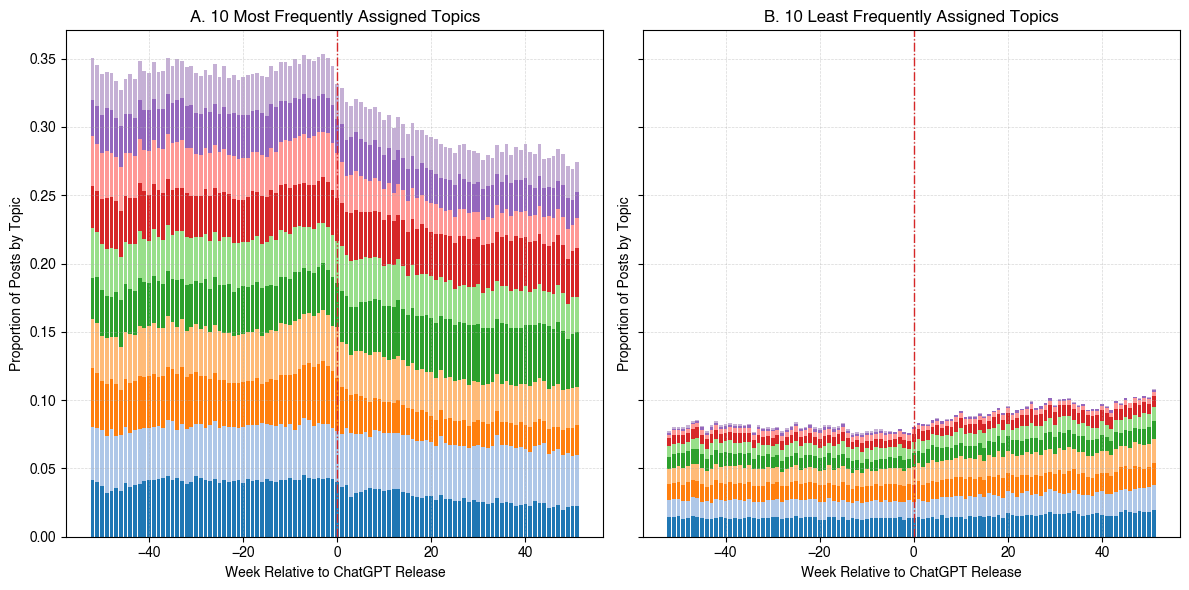

In [10]:
draw_stackedbar({'A. 10 Most Frequently Assigned Topics' : top_10_to_draw
                ,   'B. 10 Least Frequently Assigned Topics' : bottom_10_to_draw})



In [11]:
stackedbar_dict = {'Top 20% Topics' : top_10_to_draw
                                        ,'Bottom 20% Topics' : bottom_10_to_draw}

# Figure2(DID)

In [12]:
output_dir = './fig/'
date_range = 'Daily'

In [13]:
conn = psycopg2.connect(host = conf.database_user['host'], dbname=conf.database_user['dbname'], user=conf.database_user['user'], password=conf.database_user['password'])
try:
    cur = conn.cursor()
    cur.execute("\
           select a.c_date               as c_date \
                , a.tag     as tag \
                , a.tag_count             as tag_count \
           from tag_for_did a \
; \
                " 
   )
    rows = cur.fetchall()
    

except psycopg2.DatabaseError as db_err:
    print(db_err)
finally : 
  cur.close()

In [14]:
df = pd.DataFrame(rows, columns = [
  'cdate' 
, 'tag' 
, 'tag_count'
])

In [15]:
df.sort_values(by=['cdate', 'tag'], ascending=True, inplace=True)

In [16]:
tot_df = df.groupby(['cdate'])['tag_count'].sum().reset_index(name='tot_cnt')

In [17]:
df_proportion = pd.merge(df, tot_df, on = 'cdate')
# .reset_index(name='count')

In [18]:
df_proportion['proportion'] = df_proportion['tag_count']/df_proportion['tot_cnt']

In [19]:
df_entropy = df_proportion.groupby(['cdate'])['proportion'].apply(lambda x : calculate_entropy(x)).to_frame(name = 'entropy').reset_index()
df_gini = df_proportion.groupby(['cdate'])['proportion'].apply(lambda x : calculate_gini(x)).to_frame(name = 'gini').reset_index()

In [20]:
df_coef = pd.merge(df_gini, df_entropy, on = 'cdate')

In [21]:
print(df_gini.shape)
print(df_entropy.shape)

(1099, 2)
(1099, 2)


In [22]:
df_coef.head()

,cdate,gini,entropy
0,2020-11-30,0.679385,6.679751
1,2020-12-01,0.683089,6.713969
2,2020-12-02,0.685342,6.718752
3,2020-12-03,0.689771,6.750750
4,2020-12-04,0.679014,6.733105


In [23]:
post_std_date = datetime.datetime(2022, 11, 30)
pre_std_date = datetime.datetime(2021, 12, 1)

In [24]:
df_coef['cdate'] = pd.to_datetime(df_coef['cdate'], format="%Y-%m-%d")

In [25]:
df_coef['post_std_diff'] = (df_coef['cdate'] - post_std_date).dt.days
df_coef['pre_std_diff'] = (df_coef['cdate'] - pre_std_date).dt.days

In [26]:
date_range = 7*15

In [27]:
df_coef.head()

,cdate,gini,entropy,post_std_diff,pre_std_diff
0,2020-11-30,0.679385,6.679751,-730,-366
1,2020-12-01,0.683089,6.713969,-729,-365
2,2020-12-02,0.685342,6.718752,-728,-364
3,2020-12-03,0.689771,6.750750,-727,-363
4,2020-12-04,0.679014,6.733105,-726,-362


In [28]:
df_coef_post = df_coef[((df_coef['post_std_diff']) >=-date_range) &((df_coef['post_std_diff']) <date_range) ]
df_coef_post = df_coef_post.rename(columns = {'post_std_diff':'std_diff'})

In [29]:
df_coef_pre = df_coef[((df_coef['pre_std_diff']) >=-date_range) &((df_coef['pre_std_diff']) <date_range) ]
df_coef_pre = df_coef_pre.rename(columns = {'pre_std_diff':'std_diff'})

In [30]:
df_coef_post.loc[:, 'treated'] = 1
df_coef_pre.loc[:, 'treated'] = 0

In [31]:
print(df_coef_post['cdate'].min())
print(df_coef_post['cdate'].max())
print(df_coef_pre['cdate'].min())
print(df_coef_pre['cdate'].max())

2022-08-17 00:00:00
2023-03-14 00:00:00
2021-08-18 00:00:00
2022-03-15 00:00:00


In [32]:
df_coef_post.loc[:, 'post'] = np.where(df_coef_post['std_diff'] >=0, 1, 0)
df_coef_pre.loc[:, 'post']  = np.where(df_coef_pre['std_diff'] >=0, 1, 0)

In [33]:
data = pd.concat([df_coef_post[['cdate', 'gini', 'entropy', 'std_diff', 'treated',
       'post']],   df_coef_pre[['cdate', 'gini', 'entropy', 'std_diff', 'treated',
       'post']]], axis= 0)

In [34]:
data['rel_week'] = np.floor(data['std_diff']/7)

In [35]:
print(data['rel_week'].min())
print(data['rel_week'].max())

-15.0
14.0


In [36]:
def calc_did(data, measure):
    data['rel_week'] = data['rel_week'].astype('category')
    data['std_diff'] = data['std_diff'].astype('category')
    # 회귀식: 주차별 상호작용 포함
    model = smf.ols(f"{measure} ~ C(rel_week) * treated", data=data)
    did_result = model.fit(cov_type='HAC', cov_kwds={'maxlags': 7}) 

    return did_result

In [37]:
def pp_did_result(did_result) :
    # 결과 정리
    periods = np.arange(list(data['rel_week'].unique())[1], list(data['rel_week'].unique())[-1]+1, 1)
    coefs = did_result.params
    std_errors = did_result.bse 
    conf = did_result.conf_int()
    coefs_filtered      = coefs.loc[[f'C(rel_week)[T.{i}]:treated' for i in periods]].values
    std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treated' for i in periods]].values

    # 신뢰구간 계산
    ll_95 = coefs_filtered - 1.965 * std_errors_filtered
    ul_95 = coefs_filtered + 1.965 * std_errors_filtered

    # 데이터프레임 생성 (계수와 신뢰구간)
    df_coefs = pd.DataFrame({
        'period'    : periods,
        'Estimate'  : coefs_filtered,
        'll_95'     : ll_95,
        'ul_95'     : ul_95
    })
    return df_coefs




In [38]:
g_did_result = calc_did(data, 'gini')
e_did_result = calc_did(data, 'entropy')

g_event_effects = pp_did_result(g_did_result)
e_event_effects = pp_did_result(e_did_result)


In [39]:
event_effects_dict = dict()
event_effects_dict['Gini coefficient'] = g_event_effects
event_effects_dict['Entropy'] = e_event_effects

In [40]:
alpha_dict = {0 : 'A. ', 1 : 'B. '}

In [41]:
colors_left = [
    "#1f77b4",  # muted blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow-green
    "#17becf",  # cyan
]

colors_right = [
    "#332288", "#88CCEE", "#44AA99", "#117733", "#999933",
    "#DDCC77", "#CC6677", "#882255", "#AA4499", "#661100"
]


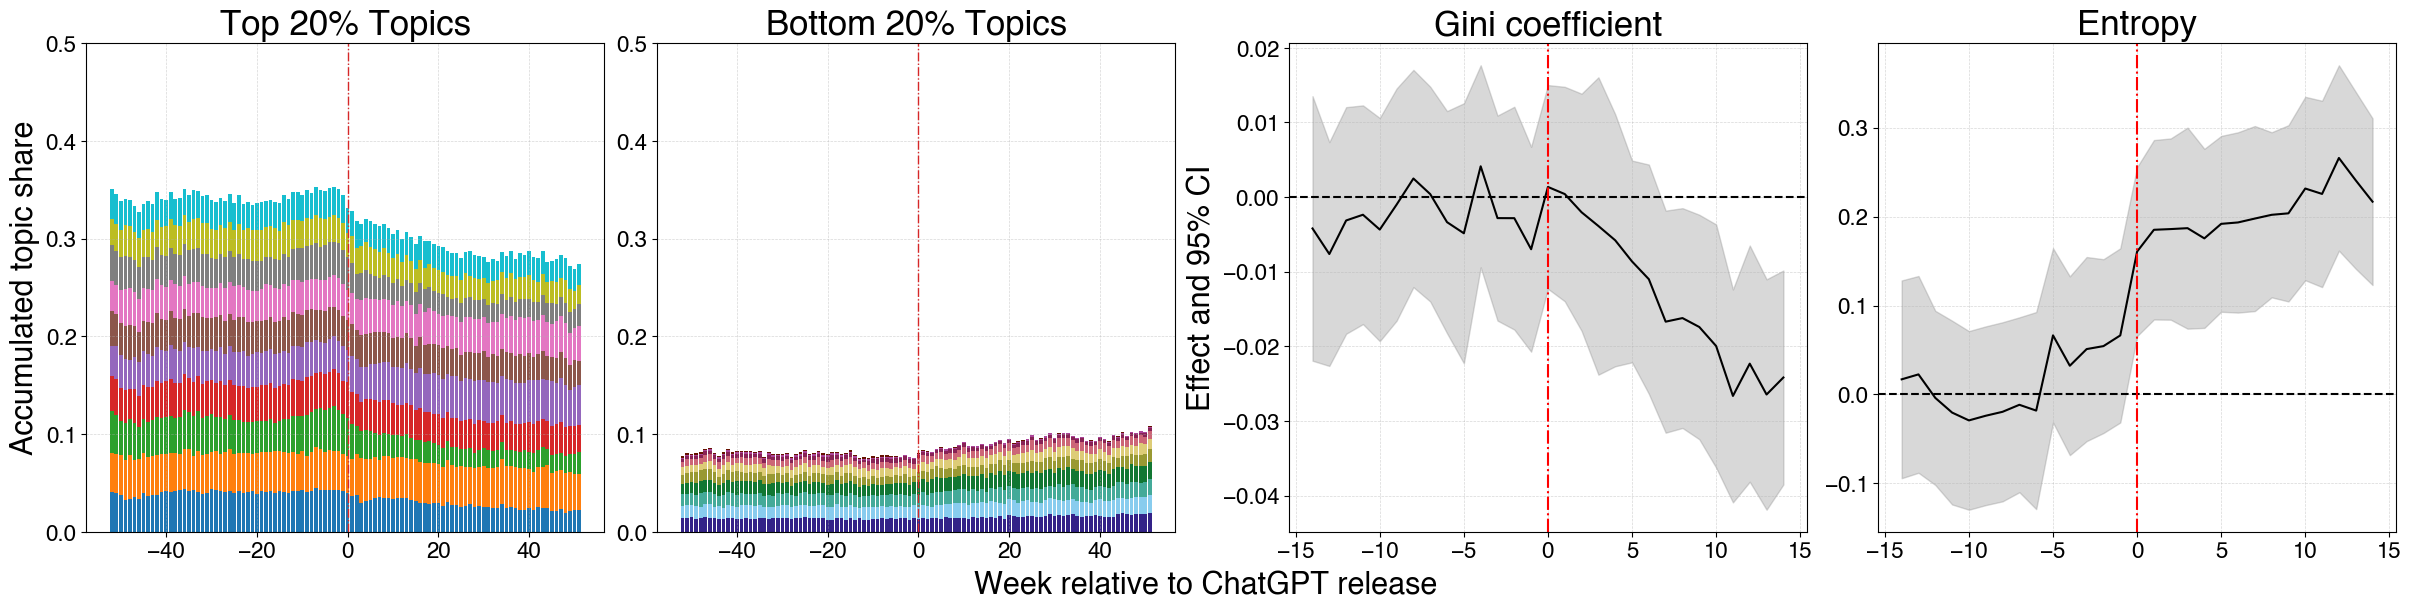

In [42]:

### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False
# g_num  = len(proportion_dict.items())

fig, axs = plt.subplots(1, 4, figsize = (24, 6), constrained_layout=True)
colors = plt.get_cmap('tab20').colors 


for x, (title, proportion) in enumerate(stackedbar_dict.items()):
    y_length = len(list(proportion.values())[0])
    bottom = np.array([0.0]*y_length)
    x_rel, divider = get_dist_x_div(list(proportion.values())[0])
    color_idx_list = [xx for xx in range(len(colors)) if xx % 2 == x]
    
    for idx, (topic, count) in enumerate(proportion.items()):    
        # p = axs[x].bar(x_rel, count, bottom=bottom, label=topic, color = colors[color_idx_list[idx]])
        p = axs[x].bar(x_rel, count, bottom=bottom, label=topic, color = colors_left[idx] if x==0 else colors_right[idx])
        bottom += count
    axs[x].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
    
    # axs[x].set_ylabel("Accumulated topic share", fontsize = 22)
    axs[x].set_title(f'{title}', fontsize=25)
    axs[x].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    axs[x].set_ylim(0, 0.5)

# 신뢰구간 영역
for idx, measure in enumerate(event_effects_dict):
    idx+=2

    axs[idx].fill_between(event_effects_dict[measure]['period'], event_effects_dict[measure]['ll_95'], event_effects_dict[measure]['ul_95'], color='gray', alpha=0.3)
    axs[idx].plot(event_effects_dict[measure]['period'], event_effects_dict[measure]['Estimate'], color='black', label='DID Estimate')

    # 기준선
    axs[idx].axhline(0, linestyle='--', color='black')
    axs[idx].axvline(0, linestyle='dashdot', color='red', label='ChatGPT Release')

    # 축 라벨과 제목
    axs[idx].set_title(f"{measure}", fontsize=25)
    axs[idx].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

axs[0].tick_params(axis='x', labelsize=16)
axs[1].tick_params(axis='x', labelsize=16)
axs[2].tick_params(axis='x', labelsize=16)
axs[3].tick_params(axis='x', labelsize=16)

axs[0].tick_params(axis='y', labelsize=16)
axs[1].tick_params(axis='y', labelsize=16)
axs[2].tick_params(axis='y', labelsize=16)
axs[3].tick_params(axis='y', labelsize=16)

axs[0].set_ylabel("Accumulated topic share", fontsize = 22)
axs[2].set_ylabel(f"Effect and 95% CI", fontsize = 22)

fig.supxlabel("Week relative to ChatGPT release", fontsize=22) 

plt.savefig(f"{output_dir}C_Result_Fig2.png", dpi=300, bbox_inches='tight')
plt.show();

In [43]:
colors = plt.get_cmap('tab20').colors 



In [44]:
color_idx = [xx for xx in range(len(colors)) if xx % 2 == 1]

In [45]:
color_idx

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]